# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from bs4 import BeautifulSoup

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [5]:
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [7]:
soup

<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [10]:
# this code will display the mars news table data as numeric/ string (str)
Mars_table = soup.find_all('table')
Mars_df = pd.read_html(str(Mars_table))[0]
Mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [11]:
# Extract all rows of data
table = soup.find('table' , class_='table')
table 

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [12]:
# Create an empty list
Mars_weadther = []
# Loop through the scraped data to create a list of rows
Mars_weadther_table = table.find_all('th')
for header_element in Mars_weadther_table:
    title = header_element.text
    Mars_weadther.append(title)
Mars_weadther


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [13]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
Mars_weadther_df = pd.DataFrame(columns=Mars_weadther)
for row in table.find_all('tr' , class_='data-row'):
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    lenghth = len(Mars_weadther_df)
    Mars_weadther_df.loc[lenghth] = row_data

In [15]:
# Confirm DataFrame was created successfully
Mars_weadther_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [18]:
type(Mars_weadther_df)

pandas.core.frame.DataFrame

In [16]:
# Examine data type of each column
Mars_weadther_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 116.7+ KB


In [19]:
# Change data types for data analysis
Mars_weadther_df['id'] = Mars_weadther_df['id'].astype(int)
Mars_weadther_df['terrestrial_date']=pd.to_datetime(Mars_weadther_df['terrestrial_date'])
Mars_weadther_df['sol']=Mars_weadther_df['sol'].astype(int)
Mars_weadther_df['ls']=Mars_weadther_df['ls'].astype(int)
Mars_weadther_df['month']=Mars_weadther_df['month'].astype(int)
Mars_weadther_df['min_temp']=Mars_weadther_df['min_temp'].astype(float)
Mars_weadther_df['pressure']=Mars_weadther_df['pressure'].astype(float)

In [22]:
Mars_weadther_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 87.5 KB


In [21]:
# Confirm type changes were successful by examining data types again
Mars_weadther_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [24]:
# 1. How many months are there on Mars?
month=Mars_weadther_df['month'].nunique()
print(f' There are {month} months on Mars.')

 There are 12 months on Mars.


In [25]:
# 2. How many Martian days' worth of data are there?
sol = Mars_weadther_df['sol'].nunique()
print(f' There are {sol} Martian days worth of data.')

 There are 1867 Martian days worth of data.


In [32]:
# 3. What is the average low temperature by month?
Avg_Weather_by_month=Mars_weadther_df.groupby(['month'])['min_temp'].mean()
Avg_Weather_by_month=Avg_Weather_by_month.to_frame()
Avg_Weather_by_month=Avg_Weather_by_month.reset_index()
Avg_Weather_by_month

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


<function matplotlib.pyplot.show(close=None, block=None)>

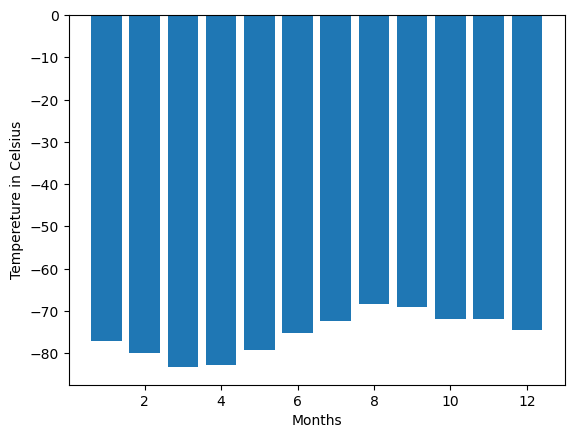

In [33]:
# Plot the average temperature by month
plt.bar(Avg_Weather_by_month['month'] , Avg_Weather_by_month['min_temp'])
plt.xlabel('Months')
plt.ylabel('Tempereture in Celsius')
plt.show

In [35]:
# Identify the coldest and hottest months in Curiosity's location
Avg_Weather_by_month = Avg_Weather_by_month.sort_values(by='min_temp')
Avg_Weather_by_month

,month,min_temp
2,3,-83.307292
3,4,-82.747423
1,2,-79.932584
4,5,-79.308725
0,1,-77.160920
5,6,-75.299320
11,12,-74.451807
6,7,-72.281690
10,11,-71.985507
9,10,-71.982143


In [36]:
print('Coldest moth is 3rd and hotest month is 8th')

Coldest moth is 3rd and hotest month is 8th


In [37]:
# 4. Average pressure by Martian month
avg_pressure_by_month = Mars_weadther_df.groupby('month')['pressure'].mean()
avg_pressure_by_month=avg_pressure_by_month.to_frame()
avg_pressure_by_month=avg_pressure_by_month.reset_index()
avg_pressure_by_month=avg_pressure_by_month.rename(columns={'pressure':'Average Pressure'})
avg_pressure_by_month

,month,Average Pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


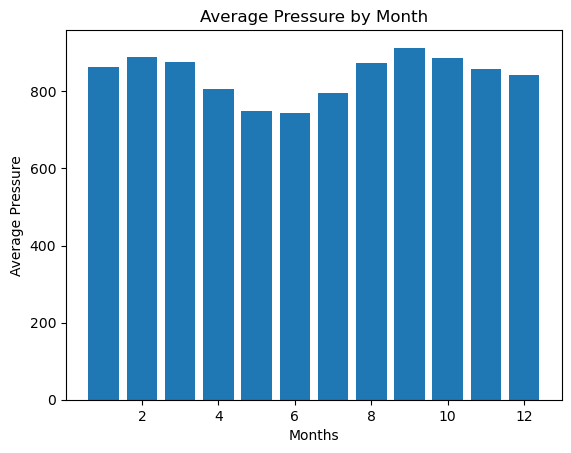

In [38]:
# Plot the average pressure by month
plt.bar(avg_pressure_by_month['month'] , avg_pressure_by_month['Average Pressure'])
plt.xlabel('Months')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month')
plt.show()

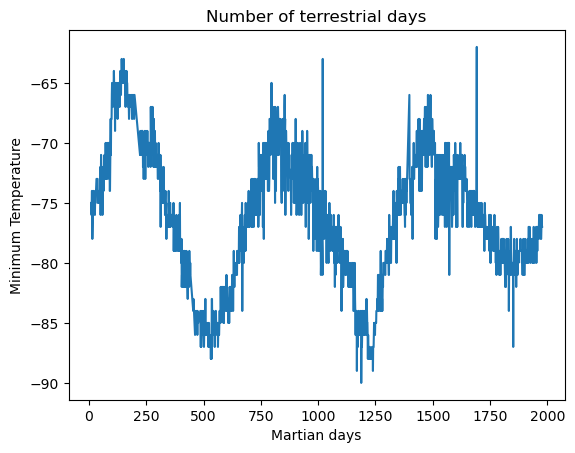

In [39]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(Mars_weadther_df['sol'], Mars_weadther_df['min_temp'])
plt.xlabel('Martian days')
plt.ylabel('Minimum Temperature')
plt.title('Number of terrestrial days')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [40]:
# Write the data to a CSV
Mars_weadther_df.to_csv('Mars_weadther' , encoding='utf8', index=False)

In [41]:
browser.quit()